In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import statistics

In [44]:
df = pd.read_csv("./output_Ndataframe.csv")

In [4]:
df = pd.read_feather("./dataframe.feather")

In [39]:
df.sample(10)

,Number of tuggers,Number of stations,Buffer Size,Average Idle Times[min]
112,11,2,"[3, 3, 3, 3, 3]",35.830000
31,3,2,"[3, 3, 3, 3, 3]",90.616667
22,2,2,"[3, 3, 3, 3, 3]",233.730000
82,8,2,"[3, 3, 3, 3, 3]",56.716667
138,13,2,"[3, 3, 3, 3, 3]",19.830000
105,10,2,"[3, 3, 3, 3, 3]",28.016667
5,0,2,"[3, 3, 3, 3, 3]",862.200000
4,0,2,"[3, 3, 3, 3, 3]",862.200000
25,2,2,"[3, 3, 3, 3, 3]",215.680000
81,8,2,"[3, 3, 3, 3, 3]",45.666667


In [5]:
df_grouped = df.groupby(["Tugger N"]).agg(Idle_1=pd.NamedAgg(column="Idle_time_1", aggfunc=lambda x: max(x)/60),
                                          Idle_2=pd.NamedAgg(column="Idle_time_2", aggfunc=lambda x: max(x)/60),
                                          Idle_3=pd.NamedAgg(column="Idle_time_3", aggfunc=lambda x: max(x)/60),
                                          Idle_4=pd.NamedAgg(column="Idle_time_4", aggfunc=lambda x: max(x)/60),
                                          Idle_5=pd.NamedAgg(column="Idle_time_5", aggfunc=lambda x: max(x)/60),
                                       Sat_1 = pd.NamedAgg(column="Saturation_1", aggfunc=lambda x: sum(x)/len(x)),
                                       Sat_2 = pd.NamedAgg(column="Saturation_2", aggfunc=lambda x: sum(x)/len(x)),
                            )

In [6]:
df_grouped["AVG idle"] = (df_grouped.Idle_1 + df_grouped.Idle_2 + df_grouped.Idle_3 + df_grouped.Idle_4 + df_grouped.Idle_5)/5
df_grouped["AVG charging saturation"] = (df_grouped.Sat_1 + df_grouped.Sat_2)/2

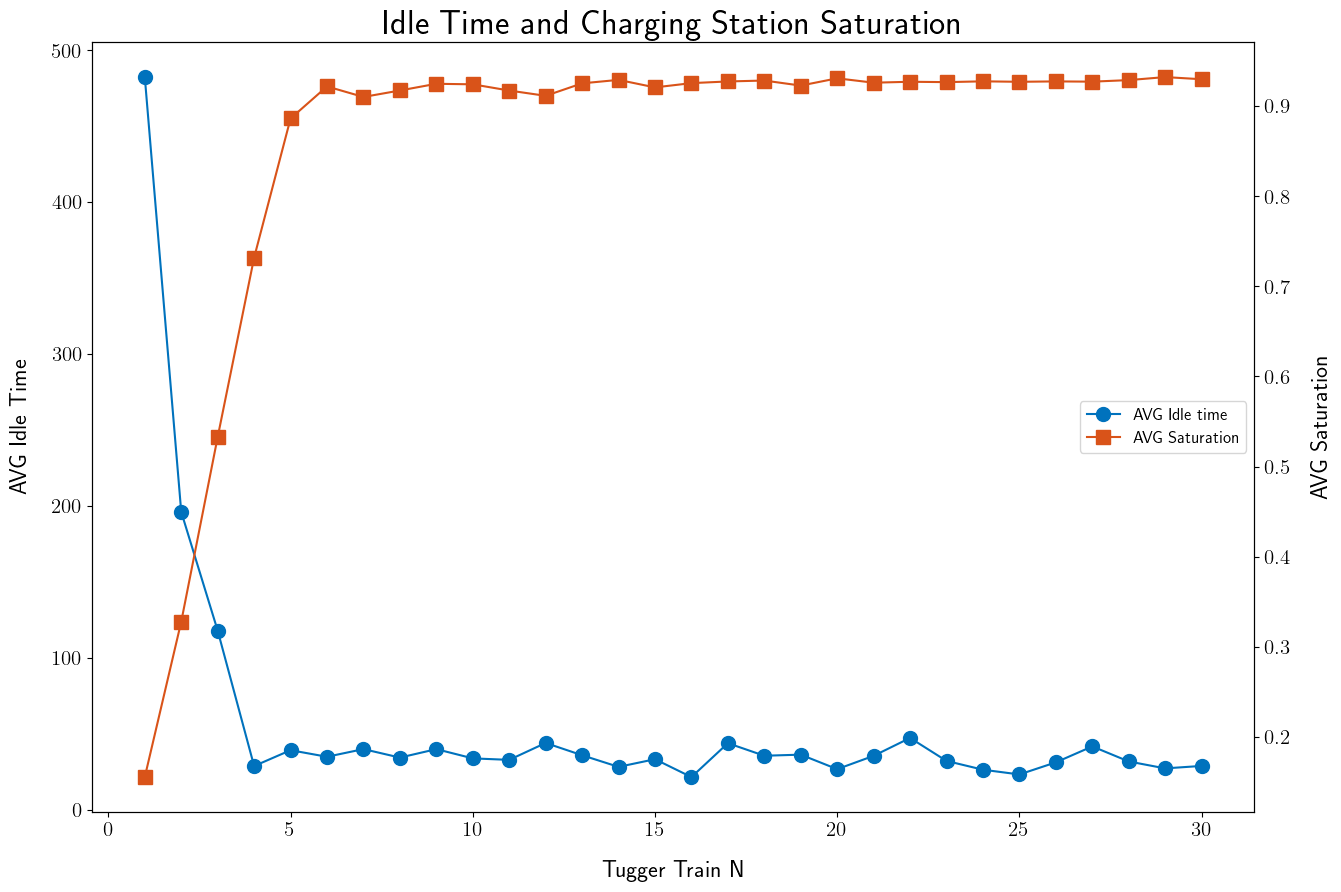

In [7]:
fig, ax = plt.subplots(figsize = (15,10))
ax.set_ylabel("AVG Idle Time",  fontdict={"fontsize":17}, labelpad = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel("Tugger Train N", fontdict={"fontsize":17}, labelpad = 15)

ax2 = ax.twinx()
ax2.set_ylabel("AVG Saturation", fontdict={"fontsize":17}, labelpad = 15)
ax2.tick_params(axis='y', which='major', labelsize=15)

lin1 = ax.plot(df_grouped["AVG idle"], label = "Idle time", color = "#0072BD", marker = "o", markersize=10)
lin2 = ax2.plot(df_grouped["AVG charging saturation"], color = "#D95319", marker = "s", markersize=10, label = "Saturation of CS")

t = ax.set_title("Idle Time and Charging Station Saturation", fontdict={"fontsize":25})

lns = lin1 + lin2
labs = ["AVG Idle time", "AVG Saturation"]
plt.legend(lns, labs, fontsize=12, loc=5)

fig.savefig("./images/idle_sat_tugger.png", dpi = 150)
plt.show()

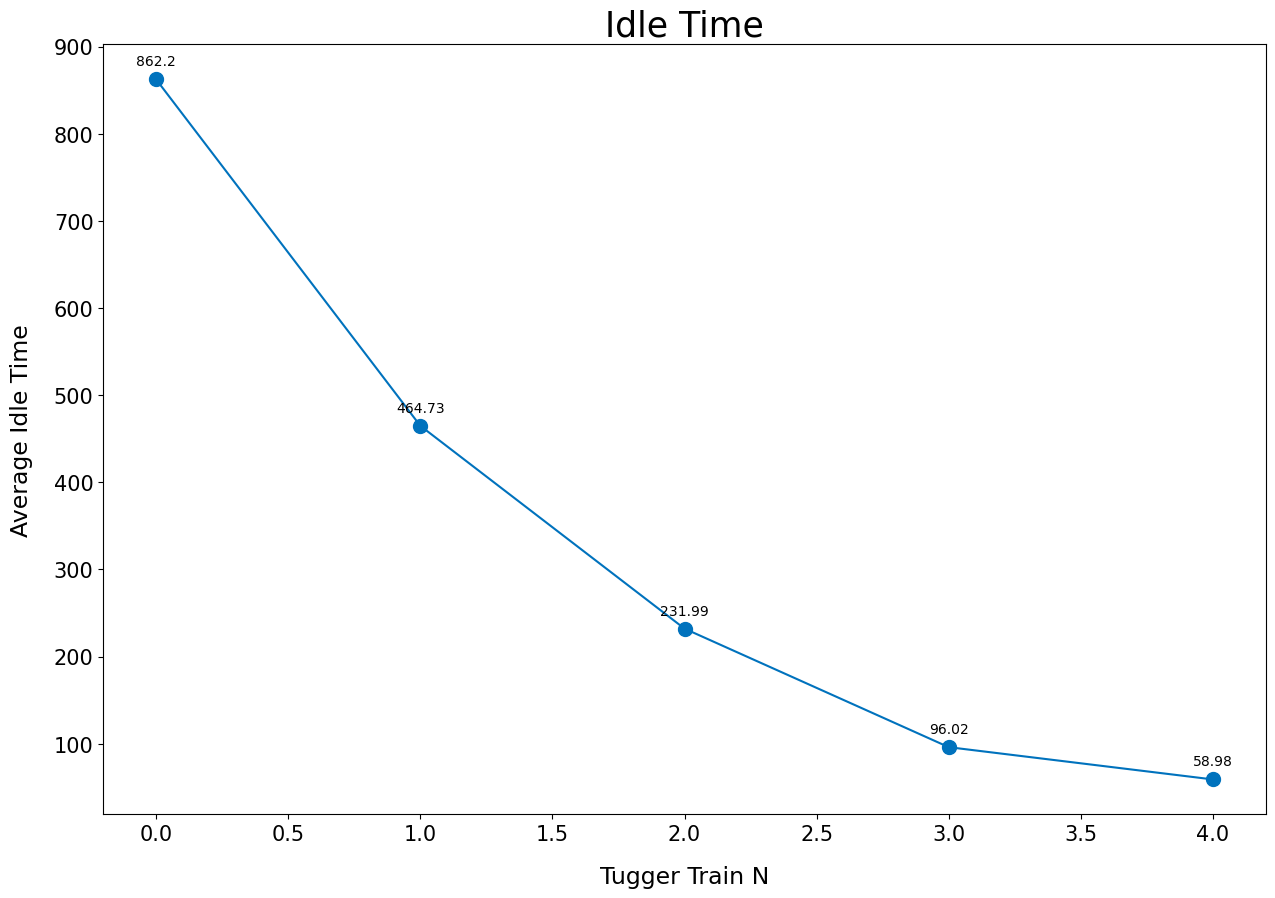

In [48]:
df_grouped
fig, ax = plt.subplots(figsize = (15,10))
ax.set_ylabel("Average Idle Time",  fontdict={"fontsize":17}, labelpad = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel("Tugger Train N", fontdict={"fontsize":17}, labelpad = 15)

lin1 = ax.plot(df_grouped["Average Idle Times[min]"], label = "Idle time", color = "#0072BD", marker = "o", markersize=10)
for i, txt in enumerate(df_grouped["Average Idle Times[min]"]):
    ax.annotate(round(txt,2), (i, df_grouped["Average Idle Times[min]"][i]), textcoords = "offset points", ha="center",xytext = (0,10))

t = ax.set_title("Idle Time", fontdict={"fontsize":25})
fig.savefig("./images/idle_sat_tugger.png", dpi = 150)
plt.show()

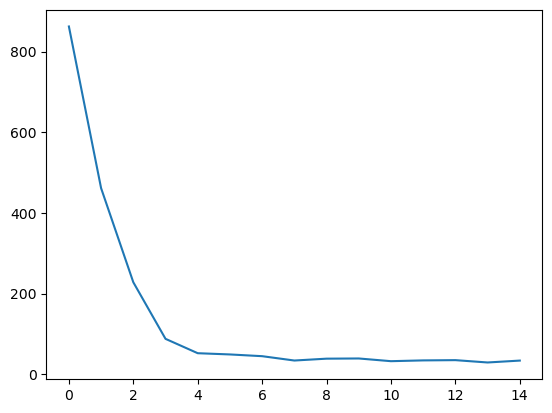

In [42]:
plt.plot(df_grouped["Average Idle Times[min]"])

In [45]:
df_grouped = df[["Number of tuggers","Average Idle Times[min]"]]

In [46]:
df_grouped = df_grouped.groupby(["Number of tuggers"]).mean()


In [16]:
import matplotlib.pyplot as plt
p = []
with open("../mean.txt", "r") as f:
    for i in f.readlines():
        p.append(float(i))

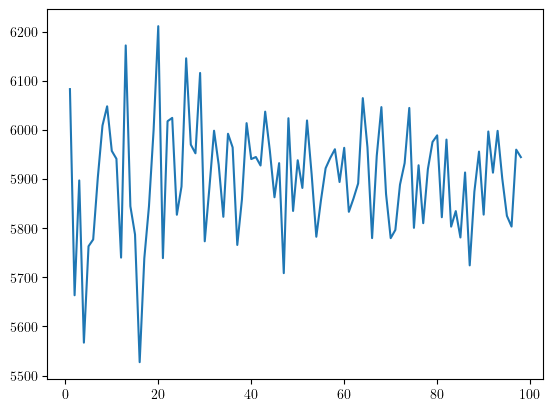

In [17]:
plt.plot([i for i in range(1,len(p)+1)], p)
plt.show()

# Create final dataframe

In [1]:
import pandas as pd
import statistics

In [2]:
df = pd.read_feather("./output_N/dataframe.feather")
df2 = pd.read_feather("./output_N/dataframe_2.feather")
df3 = pd.read_feather("./output_N/dataframe_3.feather")
df4 = pd.read_csv("./output_N/dataframe_4.csv")

In [3]:
final_dataframe = pd.concat([df, df2, df3, df4], axis = 0)

In [4]:
final_dataframe.reset_index(inplace = True)

In [5]:
final_dataframe.drop(labels=["index"], inplace=True, axis =1)

In [6]:
final_dataframe["Buff size"]=final_dataframe["Buffer Size"].str[1]

In [7]:
final_dataframe.drop(["Buffer Size"], axis = 1, inplace = True)

In [8]:
final_dataframe

,Number of tuggers,Number of stations,Average Idle Times[min],Buff size
0,6,2,36.516667,3
1,6,3,45.680000,3
2,6,4,51.760000,3
3,6,2,37.440000,3
4,6,3,58.940000,3
...,...,...,...,...
23995,6,2,21.276667,8
23996,6,3,4.966667,8
23997,6,4,11.276667,8
23998,6,5,2.026667,8


In [9]:
df_output = final_dataframe.groupby(["Number of stations", "Buff size"]).agg(N=pd.NamedAgg(column="Average Idle Times[min]", aggfunc=lambda x: len(x)),
                                                                MAX=pd.NamedAgg(column="Average Idle Times[min]", aggfunc=max),
                                                                MIN=pd.NamedAgg(column="Average Idle Times[min]", aggfunc=min),
                                                                AVG=pd.NamedAgg(column="Average Idle Times[min]", aggfunc=statistics.mean),
                                                                VARIANCE=pd.NamedAgg(column="Average Idle Times[min]", aggfunc=statistics.variance),
                                                                MEDIAN=pd.NamedAgg(column="Average Idle Times[min]", aggfunc=statistics.median), 
                                                                RANGE= pd.NamedAgg(column="Average Idle Times[min]", aggfunc=lambda x: max(x)-min(x))) 

In [10]:
df_output

N         MAX        MIN         AVG  \
Number of stations Buff size                                           
2                  3          800   72.846667  12.446667   41.249671   
                   4          800   65.906667   8.866667   34.848025   
                   5          800   54.856667   8.330000   28.818175   
                   6          800   47.440000   4.850000   23.442121   
                   7          800   41.080000   3.583333   20.018154   
                   8          800   36.666667   0.000000   16.553883   
3                  3          800   67.213333   8.906667   39.271700   
                   4          800   58.983333   5.440000   30.564708   
                   5          800   48.863333   2.913333   22.903971   
                   6          800   37.070000   0.156667   17.450312   
                   7          800   29.676667   0.283333   13.083667   
                   8          800   25.080000   0.000000    9.254479   
4                  3          800   66.483333   9.910000   39.556358   
                   4          800   59.023333   3.673333   30.832529   
                   5          800   45.360000   3.606667   22.443833   
                   6          800   36.196667   2.806667   16.662771   
                   7          800   28.596667   0.420000   11.607042   
                   8          800   21.403333   0.000000    7.830433   
5                  3          800  124.680000   9.713333   73.492854   
                   4          800  106.363333   3.133333   57.007167   
                   5          800   77.936667   3.333333   41.509708   
                   6          800   57.620000   1.783333   30.765346   
                   7          800   44.523333   0.000000   20.878808   
                   8          800   34.900000   0.000000   12.823829   
6                  3          800  263.986667  33.946667  149.488529   
                   4          800  218.363333  14.776667  119.440062   
                   5          800  165.230000   5.393333   91.692262   
                   6          800  124.103333   6.276667   66.741446   
                   7          800   92.560000   0.530000   47.283658   
                   8          800   69.553333   0.000000   30.646925   

                                 VARIANCE      MEDIAN       RANGE  
Number of stations Buff size                                       
2                  3           110.792404   40.803333   60.400000  
                   4           104.810239   34.631667   57.040000  
                   5            80.204597   27.975000   46.526667  
                   6            62.779453   23.255000   42.590000  
                   7            53.510385   19.785000   37.496667  
                   8            47.243033   15.911667   36.666667  
3                  3           102.146097   39.773333   58.306667  
                   4            96.491343   30.115000   53.543333  
                   5            63.150748   22.471667   45.950000  
                   6            45.101270   17.028333   36.913333  
                   7            35.795054   12.555000   29.393333  
                   8            25.150932    8.568333   25.080000  
4                  3           106.727059   39.491667   56.573333  
                   4            93.280695   30.378333   55.350000  
                   5            58.838870   22.243333   41.753333  
                   6            42.310117   16.563333   33.390000  
                   7            28.680084   10.701667   28.176667  
                   8            15.906673    7.216667   21.403333  
5                  3           364.457270   74.298333  114.966667  
                   4           273.198347   57.460000  103.230000  
                   5           154.262243   41.780000   74.603333  
                   6           106.849076   31.845000   55.836667  
                   7            75.112812   20.880000   44.523333  
                   8       

In [12]:
df_output.to_csv("./output_N/statistics.csv", index = True)